In [48]:
import os
os.listdir()

['.ipynb_checkpoints',
 'embedding.gif',
 'Fashion MNIST.ipynb',
 'fashion-mnist-sprite.png',
 'FashionMNIST',
 'Neural Network in Pytorch.ipynb',
 'Thumbs.db']

![alt text1](embedding.gif)
![alt_text2](fashion-mnist-sprite.png)

In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transforms = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [3]:
data = datasets.FashionMNIST("FashionMNIST/",train=True,transform=transforms,download=True)

100.0%

Extracting FashionMNIST/FashionMNIST\raw\train-images-idx3-ubyte.gz


111.0%

Extracting FashionMNIST/FashionMNIST\raw\train-labels-idx1-ubyte.gz


100.0%

Extracting FashionMNIST/FashionMNIST\raw\t10k-images-idx3-ubyte.gz


159.1%

Extracting FashionMNIST/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [8]:
datatransform = torch.utils.data.DataLoader(data,batch_size=64,shuffle=True)

In [9]:
images, labels = next(iter(datatransform))

In [13]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [14]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(),lr=0.003)

In [18]:
epochs = 10000
error = []
running_loss = 0
for i in range(1,epochs+1):
    
    optimizer.zero_grad()
    
    images, labels = next(iter(datatransform))
    images = images.view(images.shape[0],-1)
    
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if i%100==0:
        error.append(loss.item())
        if i%1000==0:
            print("After {} episode, Loss: {}".format(i,running_loss/len(datatransform)))

After 1000 episode, Loss: 0.2700101636143636
After 2000 episode, Loss: 0.5298017345345033
After 3000 episode, Loss: 0.7793612696571963
After 4000 episode, Loss: 1.0291785699869398
After 5000 episode, Loss: 1.270998132389301
After 6000 episode, Loss: 1.5109612895195672
After 7000 episode, Loss: 1.7408327375774952
After 8000 episode, Loss: 1.9726359912398845
After 9000 episode, Loss: 2.1956617516527044
After 10000 episode, Loss: 2.4098692574718994


In [22]:
error = np.array(error)
num_episodes = np.linspace(0,epochs,len(error))

In [25]:
plt.style.use('ggplot')

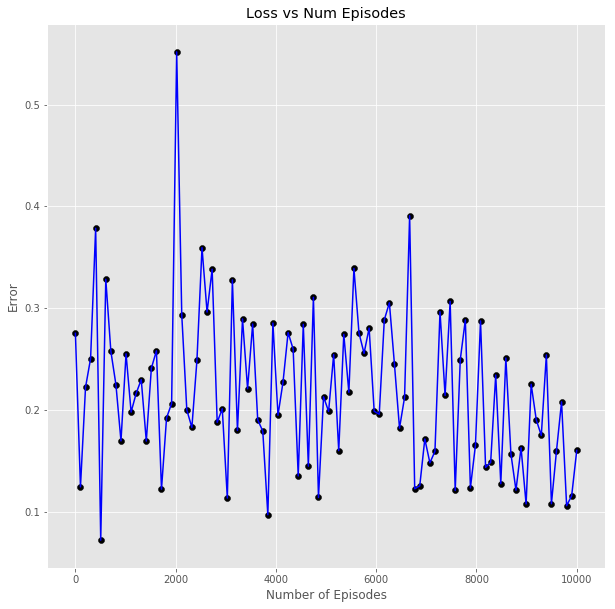

In [47]:
plt.figure(figsize=(10,10))
plt.title("Loss vs Num Episodes")
plt.plot(num_episodes,error,c='b')
plt.scatter(num_episodes,error,c='k')
plt.xlabel("Number of Episodes")
plt.ylabel("Error")
plt.show()


In [38]:
images, labels = next(iter(datatransform))
images = images.view(images.shape[0],-1)

In [42]:
predsprobs = model(images)
preds = torch.argmax(predsprobs,dim=1)
preds = preds.numpy()

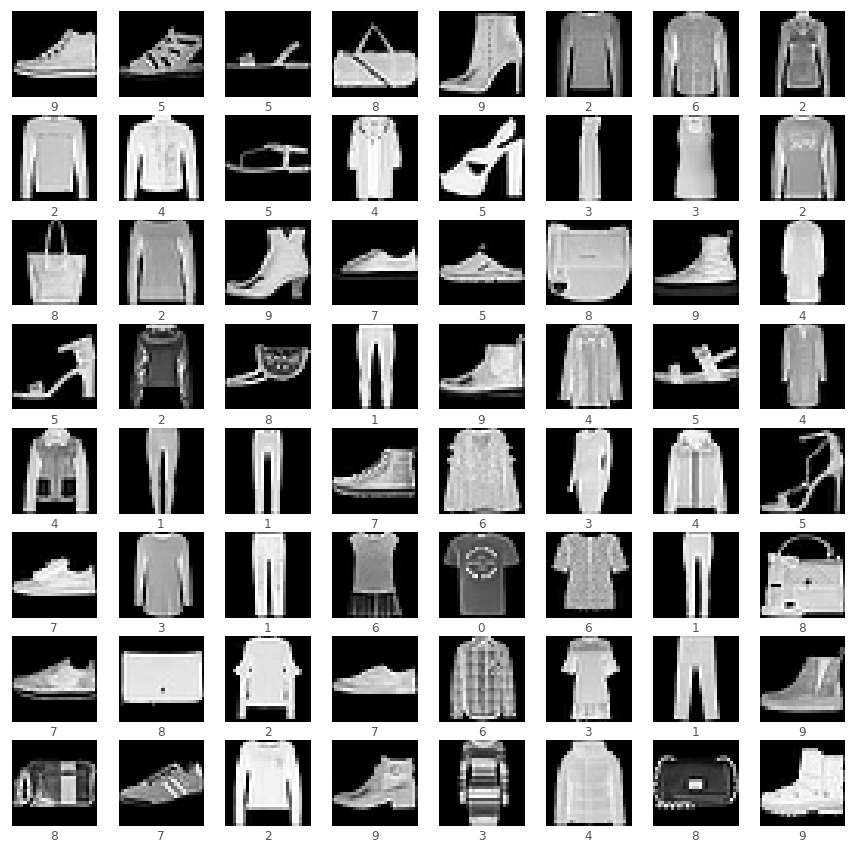

In [46]:
figure = plt.figure(figsize=(15,15))
for i in range(images.shape[0]):
    plt.subplot(8,8,i+1)
    plt.imshow(images[i].reshape(28,28),cmap='gray',interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(preds[i])
plt.show()